In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.sample(5)

,Label,EmailText
1597,spam,URGENT! Your Mobile number has been awarded wi...
714,ham,He also knows about lunch menu only da. . I know
2502,ham,Ola would get back to you maybe not today but ...
1895,ham,"Uh, heads up we don't have THAT much left"
2576,ham,In sch but neva mind u eat 1st lor..


In [4]:
df.shape

(5572, 2)

In [5]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df['Label'] =en.fit_transform(df['Label'])

In [6]:
df.head()

,Label,EmailText
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#missing values
df.isnull().sum()

Label        0
EmailText    0
dtype: int64

In [8]:
#duplicate values
df.duplicated().sum()

403

In [9]:
#remove the duplicates
df =df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape


(5169, 2)

In [12]:
#EDA
df.head()

,Label,EmailText
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['Label'].value_counts()  #data is imbalanced

0    4516
1     653
Name: Label, dtype: int64

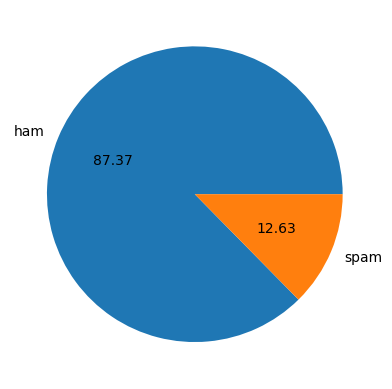

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['Label'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [15]:
!pip install nltk

In [16]:
import nltk 

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['num_characters']=df['EmailText'].apply(len)

In [19]:
df.head()

,Label,EmailText,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
#number of words
df['EmailText'].apply(lambda x :nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568    [Will, Ã_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: EmailText, Length: 5169, dtype: object

In [21]:
df['num_words']=df['EmailText'].apply(lambda x :len(nltk.word_tokenize(x)))

In [22]:
df.head()

,Label,EmailText,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sentence']=df['EmailText'].apply(lambda x :len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,Label,EmailText,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,79.200813,18.454246,1.948152
std,58.387510,13.325668,1.363792
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
#ham
df[df['Label']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.591231,17.120903,1.799601
std,56.406061,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
#spam
df[df['Label']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,138.742726,27.675345,2.975498
std,30.419480,7.011513,1.487993
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,226.000000,46.000000,8.000000


In [28]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

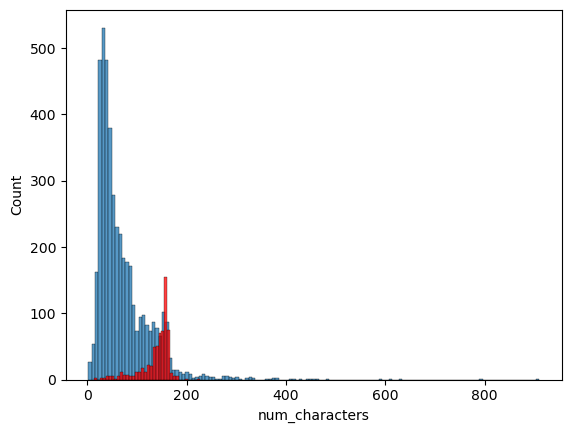

In [29]:
sns.histplot(df[df['Label']==0]['num_characters'])
sns.histplot(df[df['Label']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

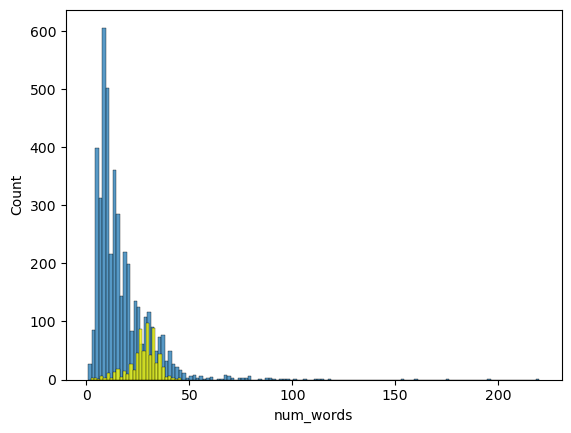

In [30]:
sns.histplot(df[df['Label']==0]['num_words'])
sns.histplot(df[df['Label']==1]['num_words'],color='yellow')

<Axes: xlabel='num_sentence', ylabel='Count'>

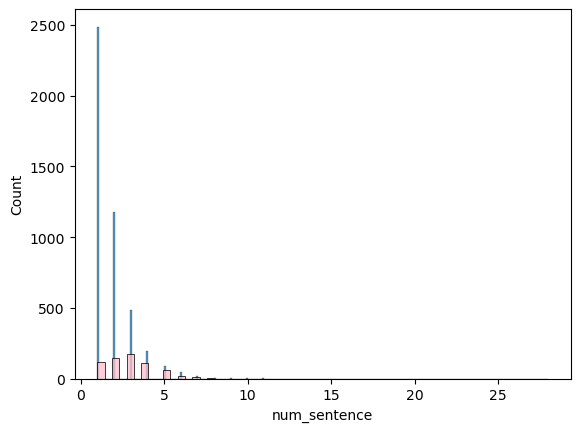

In [31]:
sns.histplot(df[df['Label']==0]['num_sentence'])
sns.histplot(df[df['Label']==1]['num_sentence'],color='pink')

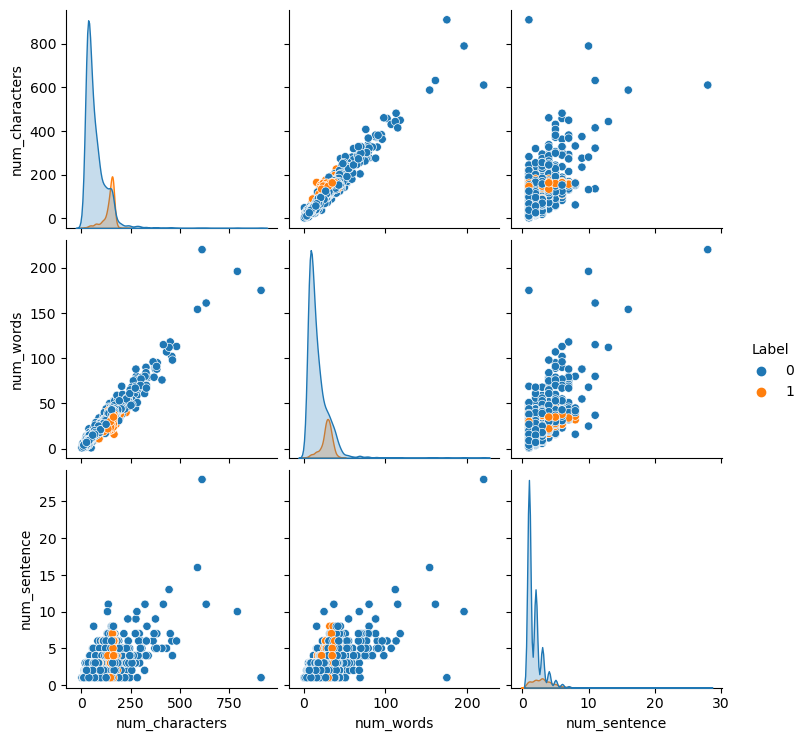

In [32]:
sns.pairplot(df,hue='Label')

In [33]:
 def transform_text(text):
        text = text.lower()
        text = nltk.word_tokenize(text)
        
        y=[]
        for i in text:
            if i.isalnum():
                y.append(i)
                
        text= y[:]
        y.clear()
        
        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
            
                 
        text= y[:]
        y.clear()
        
        for i in text:
            y.append(ps.stem(i))
            
        return" ".join(y)

In [34]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [40]:
transform_text('I loved the yt lectures on machinne learning')

'love yt lectur machinn learn'

In [41]:
df['transformed_text']= df['EmailText'].apply(transform_text)

In [42]:
df.head()

,Label,EmailText,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
!pip install wordcloud

In [44]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

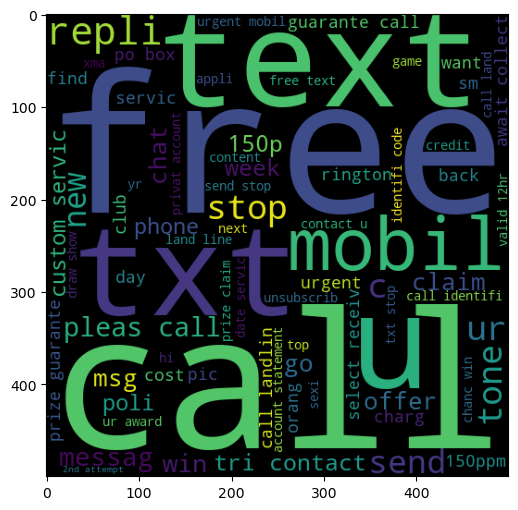

In [45]:
spam_wc = wc.generate(df[df['Label']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

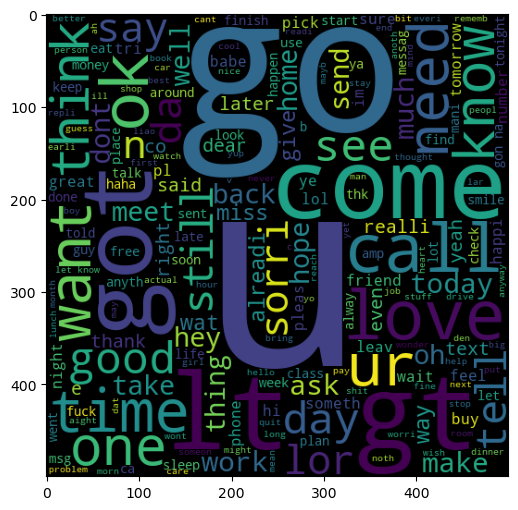

In [46]:
ham_wc = wc.generate(df[df['Label']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [47]:
spam_corpus = []
for msg in df[df['Label']==1]['transformed_text'].tolist():
    for word in msg.split():
      spam_corpus.append(word)

In [48]:
len(spam_corpus)

9936

In [49]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [50]:
ham_corpus = []
for msg in df[df['Label']==0]['transformed_text'].tolist():
    for word in msg.split():
      ham_corpus.append(word)

In [51]:
len(ham_corpus)

35295

In [52]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 138),
 ('tell', 133),
 ('make', 129)]

# Model Building

In [93]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [94]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [95]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [96]:
X.shape


(5169, 3000)

In [97]:
y=df['Label'].values

In [98]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [101]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import precision_score,confusion_matrix

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [104]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8733075435203095
[[791 105]
 [ 26 112]]
0.5161290322580645


In [105]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [106]:
bnb.fit(X_train,y_train)
y_pred2= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [107]:
#tfidf==> mnb


In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [116]:
svc = SVC(kernel='sigmoid', gamma=1.0)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
knc = KNeighborsClassifier()


In [117]:
clfs = {
    'SVC': svc,
    'LR': lrc,
    'MNB' : mnb,
    'DTC ' : dtc,
     'RFC' : rfc,
      'KNC' : knc,
   }

In [118]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    
    return accuracy,precision

In [119]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9738878143133463, 0.9743589743589743)

In [120]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9738878143133463
Precision -  0.9743589743589743
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
For  MNB
Accuracy -  0.971953578336557
Precision -  1.0
For  DTC 
Accuracy -  0.9284332688588007
Precision -  0.826530612244898
For  RFC
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  KNC
Accuracy -  0.9052224371373307
Precision -  1.0


In [121]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values(by='Accuracy', ascending=False)

In [122]:
performance_df 

,Algorithm,Accuracy,Precision
4,RFC,0.974855,0.982759
0,SVC,0.973888,0.974359
2,MNB,0.971954,1.000000
1,LR,0.956480,0.969697
3,DTC,0.928433,0.826531
5,KNC,0.905222,1.000000


In [123]:
 performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [124]:
 performance_df1

,Algorithm,variable,value
0,RFC,Accuracy,0.974855
1,SVC,Accuracy,0.973888
2,MNB,Accuracy,0.971954
3,LR,Accuracy,0.956480
4,DTC,Accuracy,0.928433
5,KNC,Accuracy,0.905222
6,RFC,Precision,0.982759
7,SVC,Precision,0.974359
8,MNB,Precision,1.000000
9,LR,Precision,0.969697


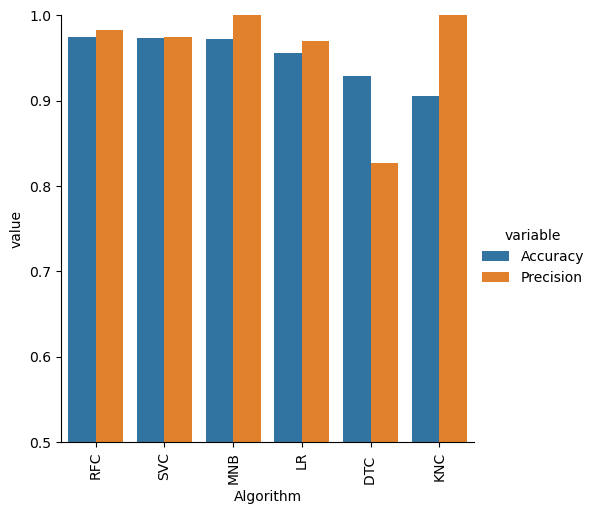

In [125]:
 sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [126]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))